# Decision Tree Regression

We create a decision tree regression in this notebook.
Firstly, we only use the first 10 data of the following data with less than 3 features to see how it processes.

In [1]:
import pandas as pd
import sys

f = open(sys.path[0] + '/../Data/melb_data.csv')
df = pd.read_csv(f)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


### 1. One fiture (The number of rooms)

The following table is for the first 10 rows and 2 columns of the above. We first create the decision tree for this.  

In [2]:
mini = df.iloc[0:10, 2:5:2]
mini

,Rooms,Price
0,2,1480000.0
1,2,1035000.0
2,3,1465000.0
3,3,850000.0
4,4,1600000.0
5,2,941000.0
6,3,1876000.0
7,2,1636000.0
8,1,300000.0
9,2,1097000.0


In [3]:
x = mini[["Rooms"]]
y = mini["Price"]

To decide the root of the decision tree, we need some calculation. For convenience, we drop three zeros in price. 

The houses in the list have 1 - 4 rooms.
There are three candidates for the root, namely, `Rooms < 1.5`, `Rooms < 2.5`, `Rooms < 3.5`.
The one which has the smallest squared error will be taken as the root of the decision tree.

(1-1) Rooms < 1.5

We set 
$$A = \{ h : \text{ The number of rooms of } h < 1.5 \}$$

A has only one element.

$$\text{Mean}(A) =  300 \qquad \text{and} \qquad \text{Squared error}(A) = \sum_{h \in A} \,(h - \text{Mean}(A))^2 = 0$$

$$\text{Mean}(A^c) = 1331.111 \qquad \text{and} \qquad \text{Squared error}(A^c) = \sum_{h \in A^c} \,(h - \text{Mean}(A^c))^2 = 1028400.88889$$

$$\text{Squared error}(A) + \text{Squared error}(A^c) = 1028400.88889.$$

(1-2) Rooms < 2.5

We set 
$$B = \{ h : \text{ The number of rooms of } h < 2.5 \}$$

$$\text{Mean}(B) =  1081.5 \qquad \text{and} \qquad \text{Squared error}(B) = \sum_{h \in B} \,(h - \text{Mean}(B))^2 = 183192.916667$$

$$\text{Mean}(B^c) = 1447.75 \qquad \text{and} \qquad \text{Squared error}(B^c) = \sum_{h \in B^c} \,(h - \text{Mean}(B^c))^2 = 141045.1875$$

$$\text{Squared error}(B) + \text{Squared error}(B^c) = 1663338.25.$$

(1-3) Rooms < 3.5

We set 
$$C = \{ h : \text{ The number of rooms of } h < 3.5 \}$$

$$\text{Mean}(C) = 1186.6666 \qquad \text{and} \qquad \text{Squared error}(C) = \sum_{h \in A} \,(h - \text{Mean}(C))^2 = 1831512$$

$$\text{Mean}(C^c) = 1600 \qquad \text{and} \qquad \text{Squared error}(C^c) = \sum_{h \in C^c} \,(h - \text{Mean}(C^c))^2 = 0$$

$$\text{Squared error}(C) + \text{Squared error}(C^c) = 1831512.$$

Since $\text{Squared error}(A) + \text{Squared error}(A^c) $ is less than $\text{Squared error}(B) + \text{Squared error}(B^c)$ and  $\text{Squared error}(C) + \text{Squared error}(C^c)$, it follows that `Rooms < 1.5` will be the root of the decision tree.

Since $\text{Squared error}(A) < \text{Squared error}(A^c)$, we split $A^c$ again. The candidates are `Rooms < 2.5` and `Rooms < 3.5`.

(2-1) 1.5 < Rooms < 2.5 

$$\text{Mean}(A^c \cap B) = 1237.8 \qquad \text{and} \qquad \text{Squared error}(A^c \cap B) = \sum_{h \in A^c \cap B} \,(h - \text{Mean}(A^c \cap B))^2 = 366266.8$$

$$\text{Mean}(A^c \cap B^c) = 1447.75 \qquad \text{and} \qquad \text{Squared error}(A^c \cap B^c) = \sum_{h \in A^c \cap B^c} \,(h - \text{Mean}(A^c \cap B^c))^2 = 564180.75$$

$$\text{Squared error}(A^c \cap B) + \text{Squared error}(A^c \cap B^c) = 912447.55$$


(2-2) 1.5 < Rooms < 3.5 

$$\text{Mean}(A^c \cap C) = 1297.5 \qquad \text{and} \qquad \text{Squared error}(A^c \cap C) = \sum_{h \in A^c \cap C} \,(h - \text{Mean}(A^c \cap C))^2 = 947062$$

$$\text{Mean}(A^c \cap C^c) = 1600 \qquad \text{and} \qquad \text{Squared error}(A^c \cap C^c) = \sum_{h \in A^c \cap C^c} \,(h - \text{Mean}(A^c \cap C^c))^2 = 0$$

$$\text{Squared error}(C) + \text{Squared error}(A^c \cap C^c) = 947062.$$

Since $\text{Squared error}(A^c \cap B) + \text{Squared error}(A^c \cap B^c) $ is less than $\text{Squared error}(A^c \cap C^c) + \text{Squared error}(A^c \cap C^c)$, it follows that we split `Room > 1.5` into two cases `Rooms < 2.5` and `Rooms > 2.5`.

If we want to split it one more time, then the case `Rooms > 2.5` should be splitted because $\text{Squared error}(A^c \cap B) < \text{Squared error}(A^c \cap B^c)$


(3) Rooms < 3.5

$$\text{Mean}(B^c \cap C) = 1397 \qquad \text{and} \qquad \text{Squared error}(B^c \cap C) = \sum_{h \in B^c \cap C} \,(h - \text{Mean}(B^c \cap C))^2 = 533274$$

$$\text{Mean}(B^c \cap C^c) = 1600 \qquad \text{and} \qquad \text{Squared error}(B^c \cap C^c) = \sum_{h \in B^c \cap C^c} \,(h - \text{Mean}(B^c \cap C^c))^2 = 0$$

$$\text{Squared error}(B^c \cap C) + \text{Squared error}(B^c \cap C^c) = 533274$$


This decision tree can be written as follows:

Rooms < 1.5 ?

Yes : 300   

No : Rooms < 2.5 ?

Yes : 1237.8

No : Rooms < 3.5 ?

Yes : 1397

No : 1600

To create the decision tree, we use Scikit Learn.

In [4]:
from sklearn.tree import DecisionTreeRegressor

mini_model = DecisionTreeRegressor(random_state=0)
mini_model.fit(x, y)

DecisionTreeRegressor(random_state=0)

The following indicates how can we create the decision tree.

In [5]:
from sklearn import tree

text_representation = tree.export_text(mini_model)
print(text_representation)

|--- feature_0 <= 1.50
|   |--- value: [300000.00]
|--- feature_0 >  1.50
|   |--- feature_0 <= 2.50
|   |   |--- value: [1237800.00]
|   |--- feature_0 >  2.50
|   |   |--- feature_0 <= 3.50
|   |   |   |--- value: [1397000.00]
|   |   |--- feature_0 >  3.50
|   |   |   |--- value: [1600000.00]



We can also visualize it as follows:

##### (1) matplotlib

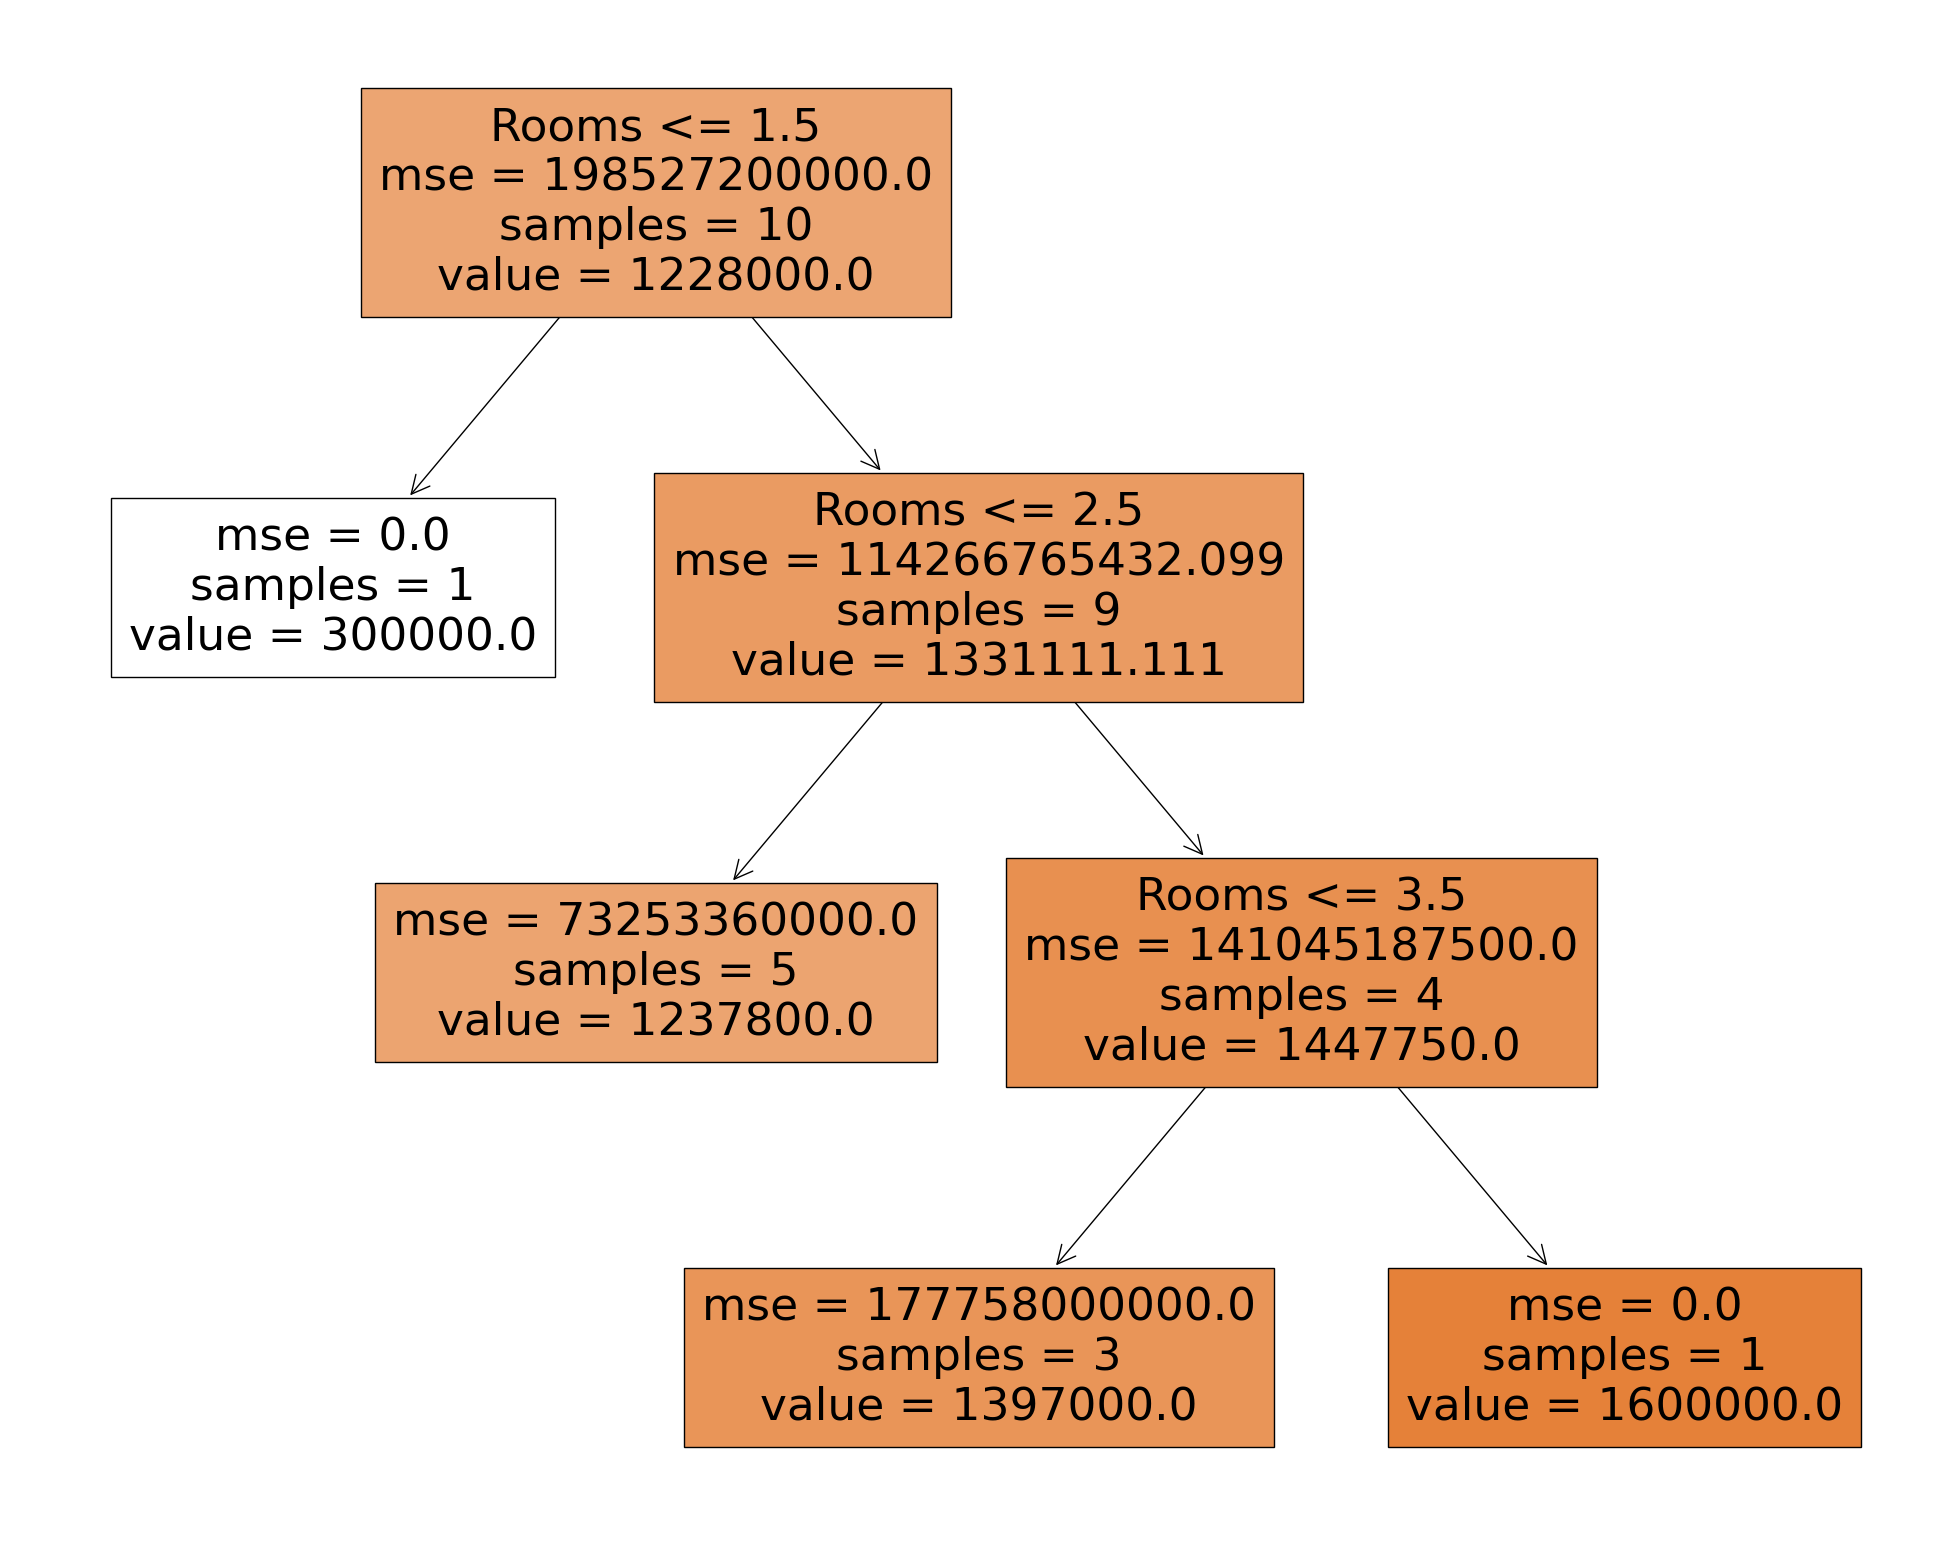

In [6]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mini_model, feature_names=x.columns, filled=True)
fig

##### (2) graphviz

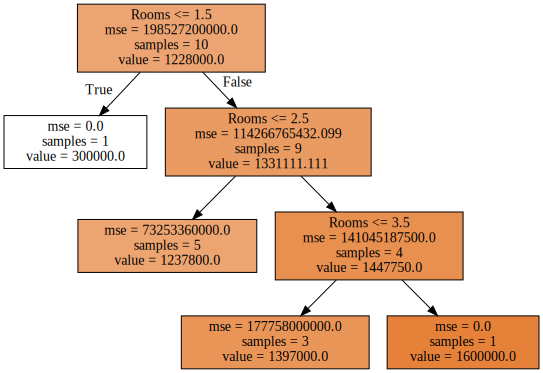

In [7]:
import graphviz

dot_data = tree.export_graphviz(mini_model, feature_names = x.columns, out_file=None, filled=True)
graphviz.Source(dot_data, format="png") 

##### (3) dtreeviz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


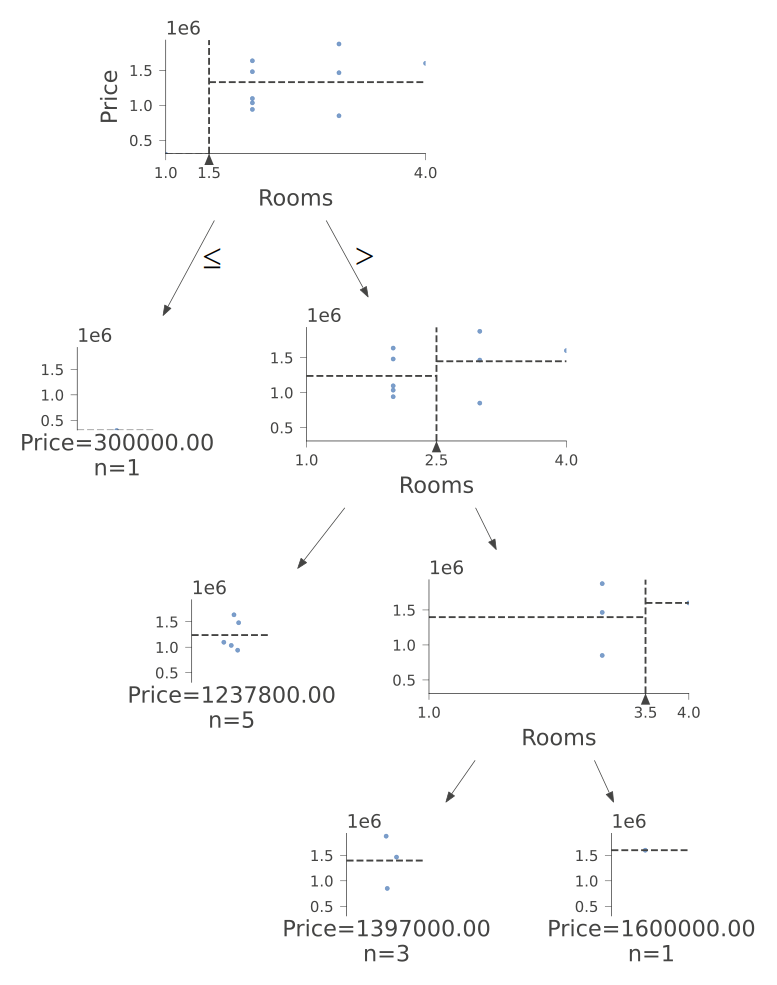

In [8]:
from dtreeviz.trees import dtreeviz 

viz = dtreeviz(mini_model, x, y,
                target_name="Price",
                feature_names=x.columns,
              scale=2.5)
viz

### 1. Two fiture (The numbers of rooms and bathrooms)

Now we consider the number of bathrooms as well.

In [9]:
choose = df.iloc[0:10]
final = choose[["Rooms", "Bathroom", "Price"]]
final

,Rooms,Bathroom,Price
0,2,1.0,1480000.0
1,2,1.0,1035000.0
2,3,2.0,1465000.0
3,3,2.0,850000.0
4,4,1.0,1600000.0
5,2,1.0,941000.0
6,3,2.0,1876000.0
7,2,1.0,1636000.0
8,1,1.0,300000.0
9,2,1.0,1097000.0


In [10]:
X = final[["Rooms", "Bathroom"]]
y = final["Price"]

For convenience, we drop three zeros in price.

The houses in the list have 1 - 4 rooms and 1-2 bathrooms There are four candidates for the root, namely, Rooms < 1.5, Rooms < 2.5, Rooms < 3.5 and Bathroom < 1.5. The one which has the smallest squared error will be taken as the root of the decision tree.

(1-1) Rooms < 1.5

We set 
$$A = \{ h : \text{ The number of rooms of } h < 1.5 \}$$

A has only one element.

$$\text{Mean}(A) =  300 \qquad \text{and} \qquad \text{Squared error}(A) = \sum_{h \in A} \,(h - \text{Mean}(A))^2 = 0$$

$$\text{Mean}(A^c) = 1331.111 \qquad \text{and} \qquad \text{Squared error}(A^c) = \sum_{h \in A^c} \,(h - \text{Mean}(A^c))^2 = 1028400.88889$$

$$\text{Squared error}(A) + \text{Squared error}(A^c) = 1028400.88889.$$

(1-2) Rooms < 2.5

We set 
$$B = \{ h : \text{ The number of rooms of } h < 2.5 \}$$

$$\text{Mean}(B) =  1081.5 \qquad \text{and} \qquad \text{Squared error}(B) = \sum_{h \in B} \,(h - \text{Mean}(B))^2 = 183192.916667$$

$$\text{Mean}(B^c) = 1447.75 \qquad \text{and} \qquad \text{Squared error}(B^c) = \sum_{h \in B^c} \,(h - \text{Mean}(B^c))^2 = 141045.1875$$

$$\text{Squared error}(B) + \text{Squared error}(B^c) = 1663338.25.$$

(1-3) Rooms < 3.5

We set 
$$C = \{ h : \text{ The number of rooms of } h < 3.5 \}$$

$$\text{Mean}(C) = 1186.6666 \qquad \text{and} \qquad \text{Squared error}(C) = \sum_{h \in A} \,(h - \text{Mean}(C))^2 = 1831512$$

$$\text{Mean}(C^c) = 1600 \qquad \text{and} \qquad \text{Squared error}(C^c) = \sum_{h \in C^c} \,(h - \text{Mean}(C^c))^2 = 0$$

$$\text{Squared error}(C) + \text{Squared error}(C^c) = 1831512.$$

(1-4) Bathroom < 1.5

We set 
$$D = \{ h : \text{ The number of bathrooms of } h < 1.5 \}$$

$$\text{Mean}(D) = 1155.5714 \qquad \text{and} \qquad \text{Squared error}(C) = \sum_{h \in D} \,(h - \text{Mean}(D))^2 = 1329593.714$$

$$\text{Mean}(D^c) = 1397 \qquad \text{and} \qquad \text{Squared error}(D^c) = \sum_{h \in D^c} \,(h - \text{Mean}(D^c))^2 = 533274$$

$$\text{Squared error}(D) + \text{Squared error}(D^c) = 1862867.714.$$

Since $\text{Squared error}(A) + \text{Squared error}(A^c) $ is less than $\text{Squared error}(B) + \text{Squared error}(B^c)$, $\text{Squared error}(C) + \text{Squared error}(C^c)$ and $\text{Squared error}(D) + \text{Squared error}(D^c)$, it follows that `Rooms < 1.5` will be the root of the decision tree.

Since $\text{Squared error}(A) < \text{Squared error}(A^c)$, we split $A^c$ again. The candidates are `Rooms < 2.5`, `Rooms < 3.5` and `Bathroom < 1.5`.

(2-1) 1.5 < Rooms < 2.5 

$$\text{Mean}(A^c \cap B) = 1237.8 \qquad \text{and} \qquad \text{Squared error}(A^c \cap B) = \sum_{h \in A^c \cap B} \,(h - \text{Mean}(A^c \cap B))^2 = 366266.8$$

$$\text{Mean}(A^c \cap B^c) = 1447.75 \qquad \text{and} \qquad \text{Squared error}(A^c \cap B^c) = \sum_{h \in A^c \cap B^c} \,(h - \text{Mean}(A^c \cap B^c))^2 = 564180.75$$

$$\text{Squared error}(A^c \cap B) + \text{Squared error}(A^c \cap B^c) = 912447.55$$


(2-2) 1.5 < Rooms < 3.5 

$$\text{Mean}(A^c \cap C) = 1297.5 \qquad \text{and} \qquad \text{Squared error}(A^c \cap C) = \sum_{h \in A^c \cap C} \,(h - \text{Mean}(A^c \cap C))^2 = 947062$$

$$\text{Mean}(A^c \cap C^c) = 1600 \qquad \text{and} \qquad \text{Squared error}(A^c \cap C^c) = \sum_{h \in A^c \cap C^c} \,(h - \text{Mean}(A^c \cap C^c))^2 = 0$$

$$\text{Squared error}(A^c \cap C) + \text{Squared error}(A^c \cap C^c) = 947062.$$

Since $\text{Squared error}(A^c \cap B) + \text{Squared error}(A^c \cap B^c) $ is less than $\text{Squared error}(A^c \cap C) + \text{Squared error}(A^c \cap C^c)$, it follows that we split `Room > 1.5` into two cases `Rooms < 2.5` and `Rooms > 2.5`.

(2-3) Rooms > 1.5 and Bathroom < 1.5

$$\text{Mean}(A^c \cap D) = 1298.167 \qquad \text{and} \qquad \text{Squared error}(A^c \cap D) = \sum_{h \in A^c \cap D} \,(h - \text{Mean}(A^c \cap D))^2 = 475590.833$$

$$\text{Mean}(A^c \cap D^c) = 1397 \qquad \text{and} \qquad \text{Squared error}(A^c \cap D^c) = \sum_{h \in A^c \cap D^c} \,(h - \text{Mean}(A^c \cap D^c))^2 = 533274$$

$$\text{Squared error}(A^c \cap D) + \text{Squared error}(A^c \cap D^c) = 1008864.833.$$

Since $\text{Squared error}(A^c \cap B) + \text{Squared error}(A^c \cap B^c) $ is less than $\text{Squared error}(A^c \cap C) + \text{Squared error}(A^c \cap C^c)$ and $\text{Squared error}(A^c \cap D) + \text{Squared error}(A^c \cap D^c)$, it follows that we split `Room > 1.5` into two cases `Rooms < 2.5` and `Rooms > 2.5`.

If we want to split it one more time, then the case `Rooms > 2.5` should be splitted because $\text{Squared error}(A^c \cap B) < \text{Squared error}((A^c \cap B)^c)$. There are two candidates `Rooms < 3.5` and `Bathroom < 1.5`.


(3-1) 2.5 < Rooms < 3.5

$$\text{Mean}(B^c \cap C) = 1397 \qquad \text{and} \qquad \text{Squared error}(B^c \cap C) = \sum_{h \in B^c \cap C} \,(h - \text{Mean}(B^c \cap C))^2 = 533274$$

$$\text{Mean}(B^c \cap C^c) = 1600 \qquad \text{and} \qquad \text{Squared error}(B^c \cap C^c) = \sum_{h \in B^c \cap C^c} \,(h - \text{Mean}(B^c \cap C^c))^2 = 0$$

$$\text{Squared error}(B^c \cap C) + \text{Squared error}(B^c \cap C^c) = 533274$$

(3-2) Rooms > 2.5 and Bathroom < 1.5

$$\text{Mean}(B^c \cap D) = 1600 \qquad \text{and} \qquad \text{Squared error}(B^c \cap D) = \sum_{h \in B^c \cap D} \,(h - \text{Mean}(B^c \cap D))^2 = 0$$

$$\text{Mean}(B^c \cap D^c) = 1397 \qquad \text{and} \qquad \text{Squared error}(B^c \cap D^c) = \sum_{h \in B^c \cap D^c} \,(h - \text{Mean}(B^c \cap D^c))^2 = 533274$$

$$\text{Squared error}(B^c \cap D) + \text{Squared error}(B^c \cap D^c) = 533274$$

The case `2.5 < Rooms < 3.5` and the case `Rooms > 2.5 and Bathroom < 1.5` have the same squarred error. So either can be splitted. As we will see, Scikit learn splits the case `Rooms > 2.5 and Bathroom < 1.5` and I do not know if it has any reason.
Anyway, if we split the case `2.5 < Rooms < 3.5`, then the result is the same as the one we drew in the above.
If we split the case `Rooms > 2.5 and Bathroom < 1.5`, then the decision tree can be written as follows:

Rooms < 1.5 ?

Yes : 300   

No : Rooms < 2.5 ?

Yes : 1237.8

No : Bathrooms < 1.5 ?

Yes : 1600

No : 1397

The other one, which is the same as the one feature case makes much more sense!

We draw the decision tree using Scikit learn.

In [11]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=0)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [12]:
text_representation = tree.export_text(melbourne_model)
print(text_representation)

|--- feature_0 <= 1.50
|   |--- value: [300000.00]
|--- feature_0 >  1.50
|   |--- feature_0 <= 2.50
|   |   |--- value: [1237800.00]
|   |--- feature_0 >  2.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- value: [1600000.00]
|   |   |--- feature_1 >  1.50
|   |   |   |--- value: [1397000.00]



##### (1) matplotlib

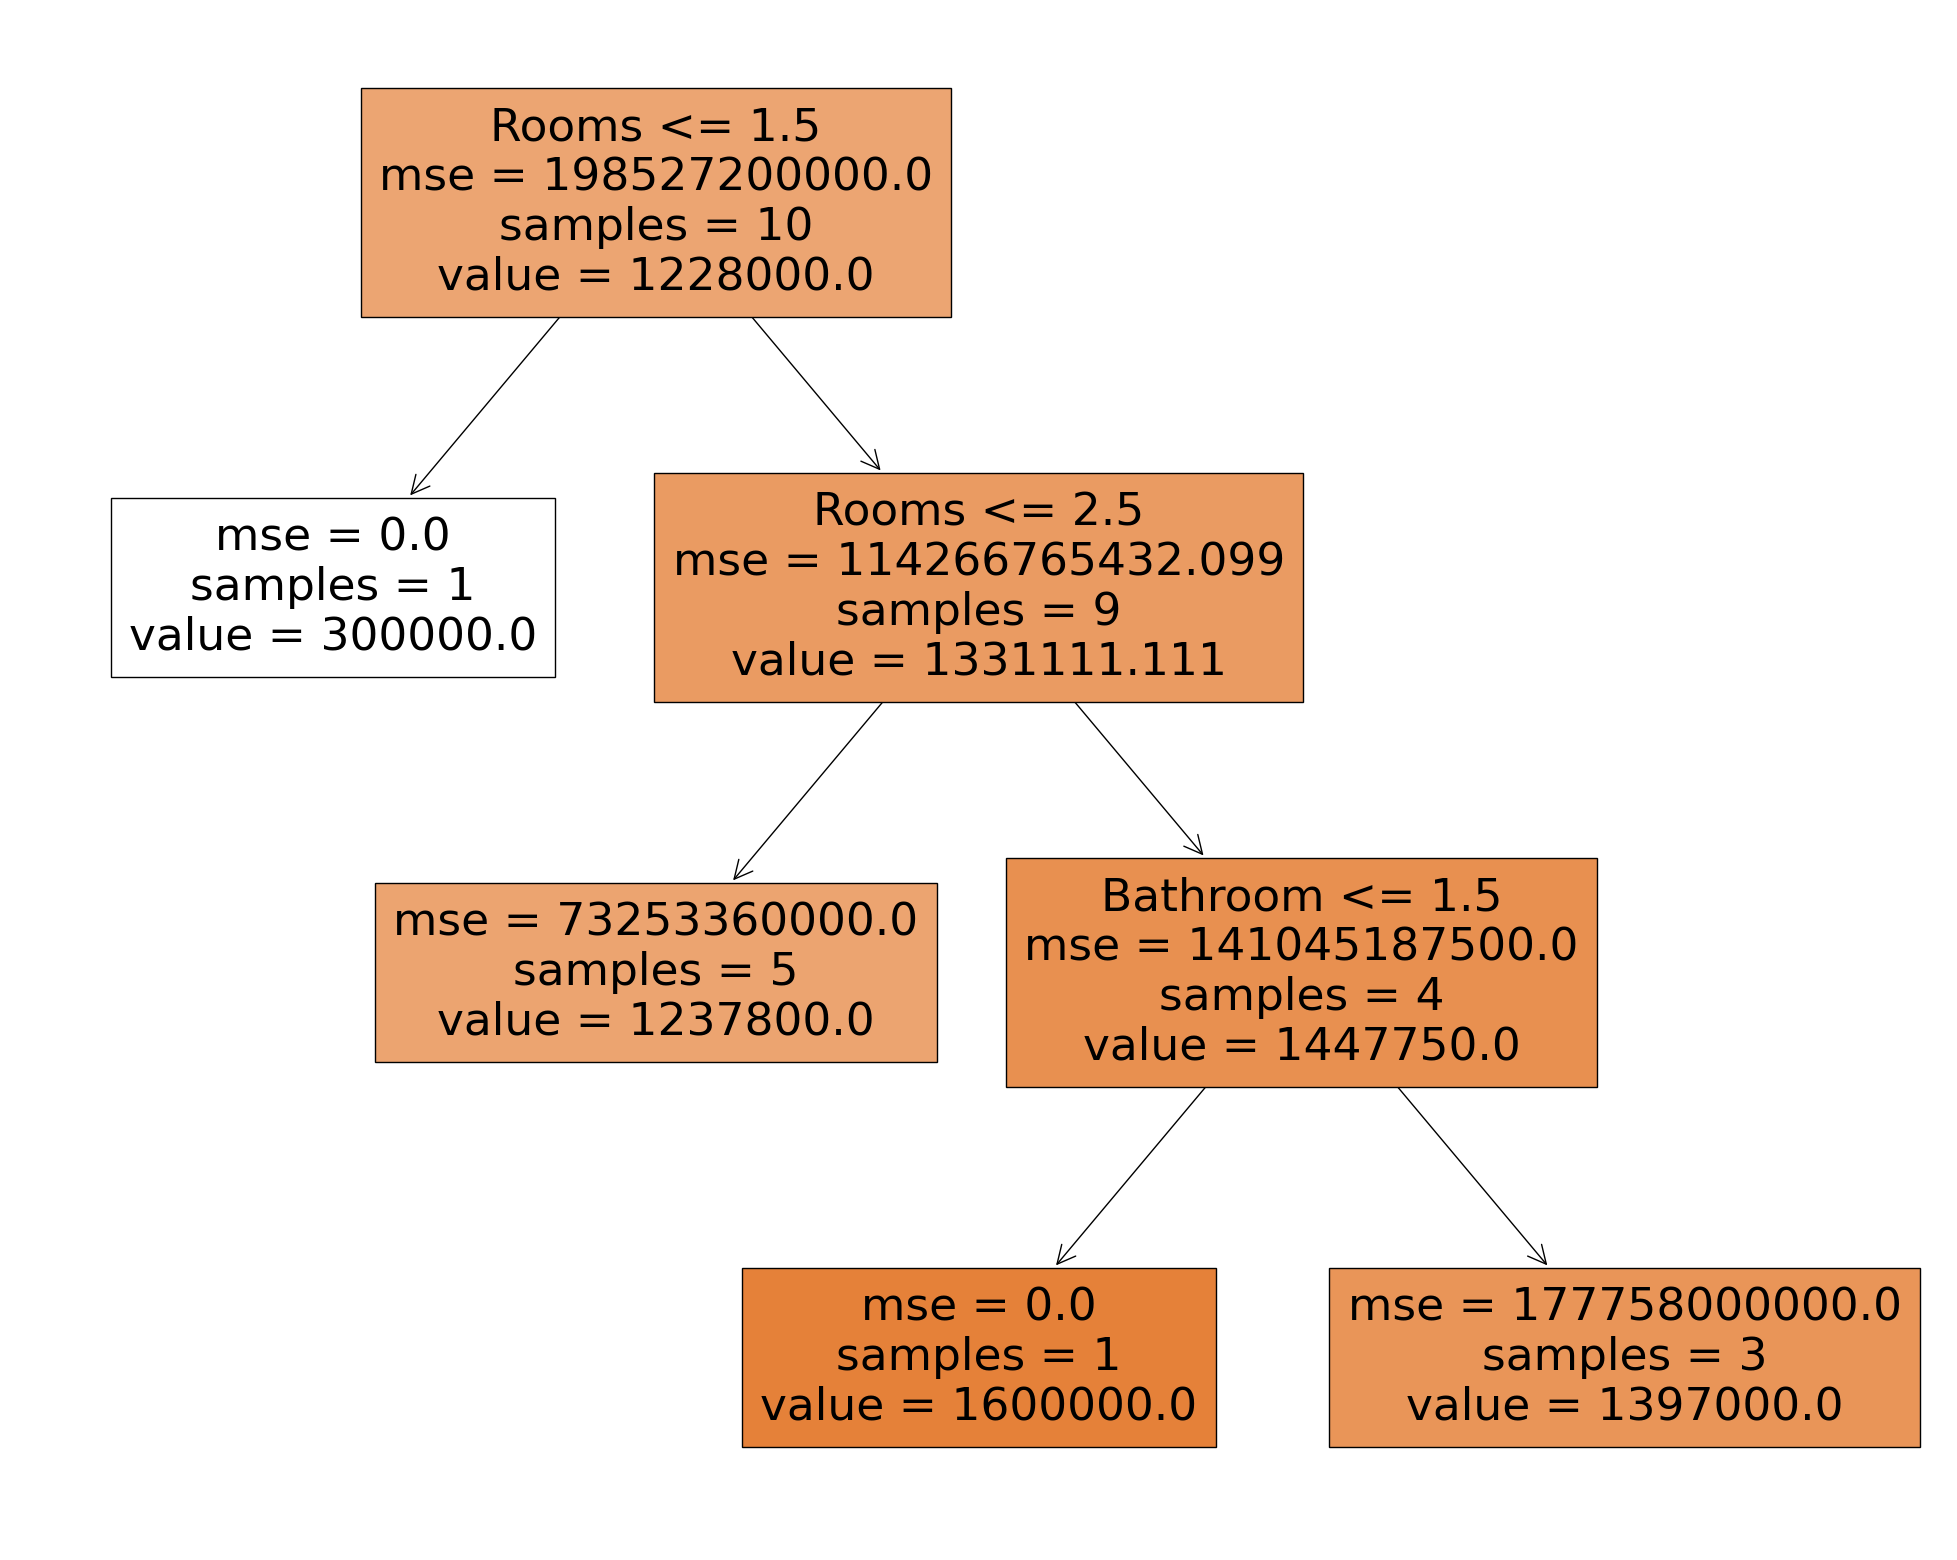

In [13]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(melbourne_model, feature_names=X.columns, filled=True)
fig

##### (2) graphviz

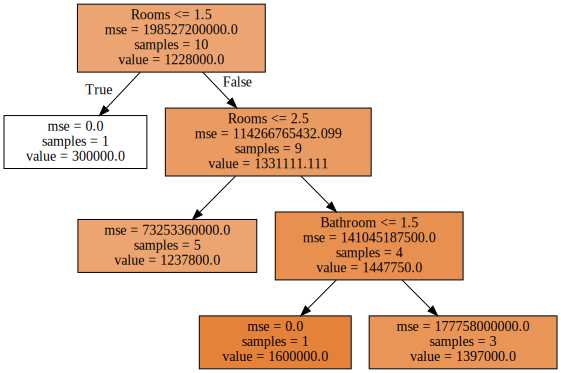

In [14]:
import graphviz
dot_data = tree.export_graphviz(melbourne_model, feature_names = X.columns, out_file=None, filled=True)
graphviz.Source(dot_data, format="png") 

##### (3) dtreeviz

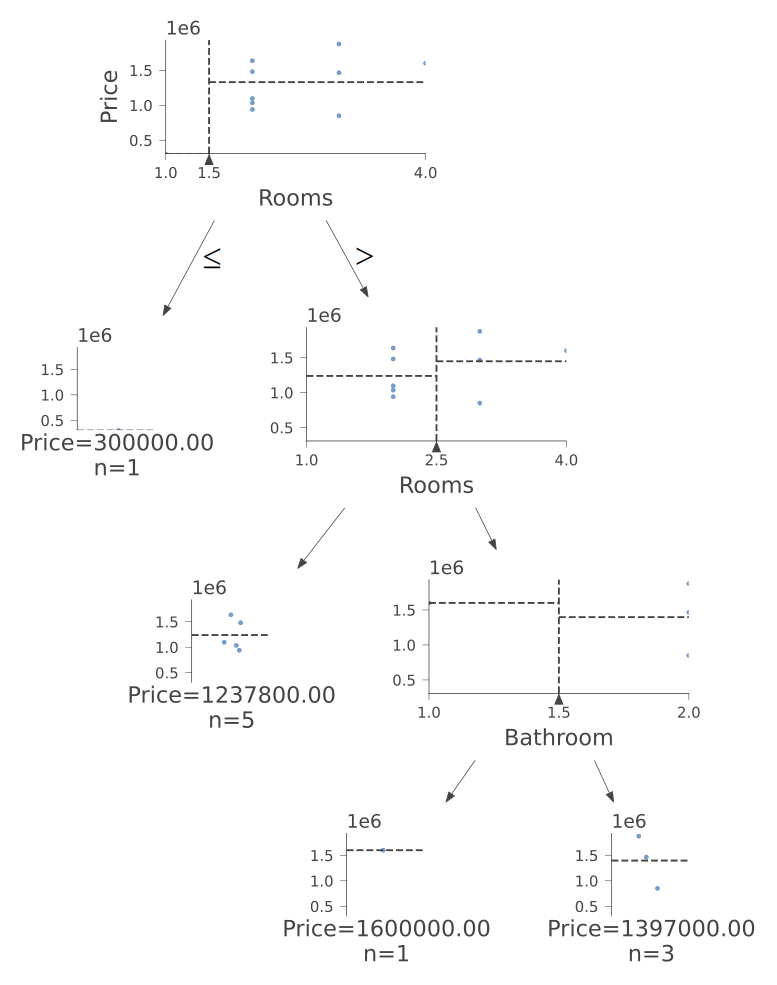

In [15]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(melbourne_model, X, y,
                target_name="Price",
                feature_names=X.columns,
              scale=2.5)
viz